<a href="https://colab.research.google.com/github/karinasekar22/machine_learning_ta/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project
Nama : Karina Sekar Putri Utami  
NRP: 3123510613  
Kelas: D3 PJJ TI  
Study Case : Breast Cancer


##Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
dataset = pd.read_csv('/content/drive/MyDrive/Data_Set/breast_cancer.csv')
dataset = dataset.drop('id', axis=1)
dataset = dataset.drop(columns=['Unnamed: 32'])
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


##Simple Exploratory Data Analysis

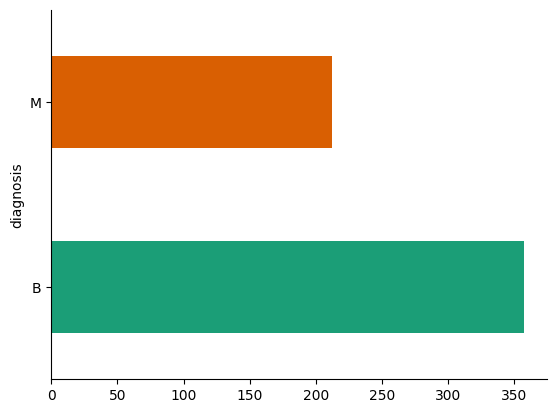

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
dataset.groupby('diagnosis').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)


Gambar ini menampilkan hasil analisis data eksploratif sederhana terhadap dataset breast cancer. Tujuannya adalah untuk mengetahui sebaran jumlah antara dua kategori diagnosis: Benign (B) dan Malignat (M). Dilihat dari persebarannya, dataset breast cancer ini imbalanced, karena lebih banyak Benign daripada Malignant

##Split Data Train dan Data Test

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(dataset, test_size = 0.2, random_state=42, stratify = dataset['diagnosis'])
print(train_data.shape)
print(test_data.shape)
dataset_capped = dataset.copy()
#simpan data yang di capped di variabel yang berbeda

(455, 31)
(114, 31)


Split data 80:10 secara random untuk data train dan data test nantinya. Digunakan juga stratify agar data di split sesuai dengan jumlah masing masing diagnosis, bukan condong ke mayoritas.

##Outlier Handling : InterQuartile Handling

In [ ]:
import scipy.stats as stats

In [ ]:
dataset.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
def check_plot(df, variable):
    # fungsi mengambil kerangka data (df) dan
    # variabel yang diminati sebagai argumen

    # tentukan ukuran gambar
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # plot Q-Q
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

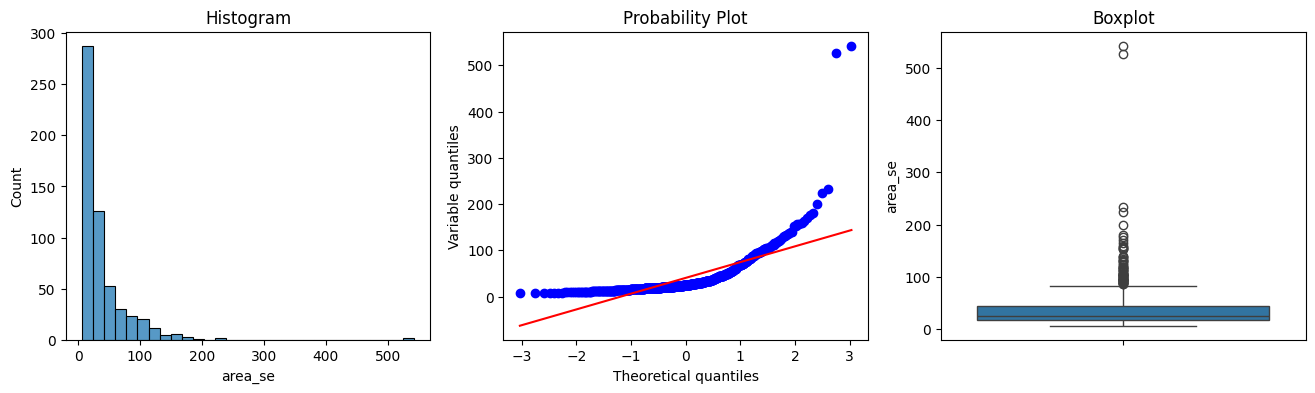

In [ ]:
# memvisualisasikan outlier di LSTAT
check_plot(dataset, 'area_se')

In [ ]:
# Ambil semua kolom numerik kecuali kolom diagnosis karena dia label
num_cols = dataset.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Kalau kolom diagnosis masih ikut remove secara manual
if 'diagnosis' in num_cols:
    num_cols.remove('diagnosis')

# Hitung jumlah outlier per kolom atau fitur numerik
for col in num_cols:
    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    outliers = dataset[(dataset[col] < lower_limit) | (dataset[col] > upper_limit)]
    outlier_count = outliers.shape[0]
    percentage = (outlier_count / dataset.shape[0]) * 100

    if outlier_count > 0:
        print(f"{col}: {outlier_count} outliers dari {dataset.shape[0]} data ({percentage:.2f}%)")

        # Cek distribusi diagnosis dari data yang outlier di kolom ini
        diagnosis_out = outliers.groupby('diagnosis').size()
        print(f"Diagnosis outliers pada '{col}':\n{diagnosis_out}\n")

        # Penilaian singkat
        if percentage < 5:
            print(f"→ Outlier pada '{col}' <5%, kemungkinan valid (rare case). Disarankan untuk dipertahankan.\n")
            # Outlier <5% dipertahankan karena bisa jadi kasus langka yang valid dalam data medis.
        else:
            print(f"→ Outlier pada '{col}' >5%, bisa dipertimbangkan untuk capping atau analisis lebih lanjut.\n")


radius_mean: 14 outliers dari 569 data (2.46%)
Diagnosis outliers pada 'radius_mean':
diagnosis
M    14
dtype: int64

→ Outlier pada 'radius_mean' <5%, kemungkinan valid (rare case). Disarankan untuk dipertahankan.

texture_mean: 7 outliers dari 569 data (1.23%)
Diagnosis outliers pada 'texture_mean':
diagnosis
B    2
M    5
dtype: int64

→ Outlier pada 'texture_mean' <5%, kemungkinan valid (rare case). Disarankan untuk dipertahankan.

perimeter_mean: 13 outliers dari 569 data (2.28%)
Diagnosis outliers pada 'perimeter_mean':
diagnosis
M    13
dtype: int64

→ Outlier pada 'perimeter_mean' <5%, kemungkinan valid (rare case). Disarankan untuk dipertahankan.

area_mean: 25 outliers dari 569 data (4.39%)
Diagnosis outliers pada 'area_mean':
diagnosis
M    25
dtype: int64

→ Outlier pada 'area_mean' <5%, kemungkinan valid (rare case). Disarankan untuk dipertahankan.

smoothness_mean: 6 outliers dari 569 data (1.05%)
Diagnosis outliers pada 'smoothness_mean':
diagnosis
B    3
M    3
dtype: i

Karena ini data medis, outlier yang ada kemungkinan mewakili kasus nyata, walaupun proporsinya kecil, jadi saya memiilih untuk mempertahankannya. Pendekatan ini menjaga integritas data sekaligus memberikan model kesempatan belajar pola dari kasus langka(rare case).


In [ ]:
def find_outlier_boundary(df, variable):

    # Hitung batas luar yang merupakan outlier

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df[variable].quantile(0.75) + (IQR * 1.5)

    return upper_boundary, lower_boundary

In [ ]:
# batas untuk semua outlier
upper_limit, lower_limit = find_outlier_boundary(dataset, 'smoothness_se')
upper_limit, lower_limit

(np.float64(0.012611500000000001), np.float64(0.0007034999999999993))

In [ ]:
# Sekarang mari kita ganti outlier dengan batas maksimum dan minimum
# Replace atau Capping -> tidak ada pengurangan baris (Nantinya akan dibandingkan, dari data yang dicapped sama yang tidak)
dataset_capped['smoothness_se']= np.where(dataset['smoothness_se'] > upper_limit, upper_limit,
                       np.where(dataset['smoothness_se'] < lower_limit, lower_limit, dataset['smoothness_se']))
print(f"Upper limit: {upper_limit}, Lower limit: {lower_limit}")
print(dataset_capped['smoothness_se'].describe())

Upper limit: 0.012611500000000001, Lower limit: 0.0007034999999999993
count    569.000000
mean       0.006876
std        0.002410
min        0.001713
25%        0.005169
50%        0.006380
75%        0.008146
max        0.012612
Name: smoothness_se, dtype: float64


Data yang sudah dioutlier handling akan disimpan di copy dataframe dengan nama dataset_capped, yang nantinya akan digunakan sebagai perbandingan manakah dataset train yang menghasilkan score terbaik.

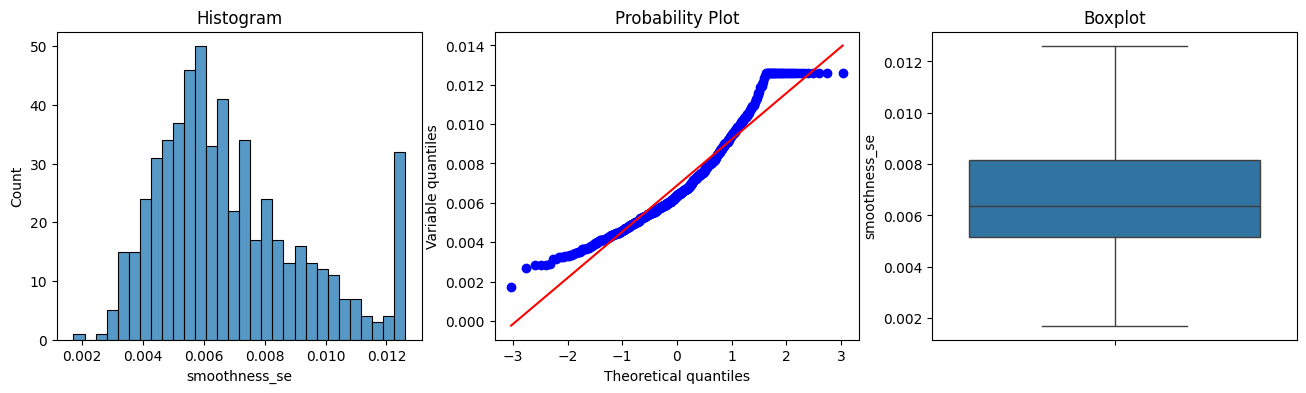

In [ ]:
# memvisualisasikan outlier di Population
check_plot(dataset_capped, 'smoothness_se')

# Naive Bayes - Gaussian

In [ ]:
#@title Normalisasi dan Split Label dan Data
#train_data
train_data_gaussian = np.array(train_data)[:, 1:]
train_label_gaussian = np.array(train_data)[:, 0]
#test-data
test_data_gaussian = np.array(test_data)[:, 1:]
test_label_gaussian = np.array(test_data)[:, 0]

#normalisasi min-max scaller untuk train data dan test data
max_element_column = np.max(train_data_gaussian, axis=0)
min_element_column = np.amin(train_data_gaussian, axis=0)
new_min = 0
new_max = 1

train_data_scaled = ((train_data_gaussian - min_element_column) * (new_max-new_min) / (max_element_column - min_element_column)) + new_min

test_data_scaled = ((test_data_gaussian - min_element_column) * (new_max-new_min) / (max_element_column - min_element_column)) + new_min

Menggunakan min max scaller secara manual

In [ ]:
#@title Modelling Process
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()

classifier.fit(train_data_scaled, train_label_gaussian)

hasil = classifier.predict(test_data_scaled)
print(hasil)

['B' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'M'
 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B'
 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'B' 'B' 'B' 'B' 'M']


In [ ]:
#@title Model Evaluation using Sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Menghitung metrik
accuracy = accuracy_score(test_label_gaussian, hasil)
precision = precision_score(test_label_gaussian, hasil, average='macro')
recall = recall_score(test_label_gaussian, hasil, average='macro')
f1 = f1_score(test_label_gaussian, hasil, average='macro')

# Menampilkan hasil
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.9210526315789473
Precision: 0.9215384615384616
Recall: 0.9077380952380952
F1-Score: 0.9138321995464853


Karena data yang digunakan cenderung tidak seimbang (skewed) antara M (Malignant) dan B (Benign), maka metrik seperti F1-Score, Precision, dan Recall lebih tepat digunakan untuk menilai performa. Secara keseluruhan, hasil ini menunjukkan performa model yang cukup bagus.

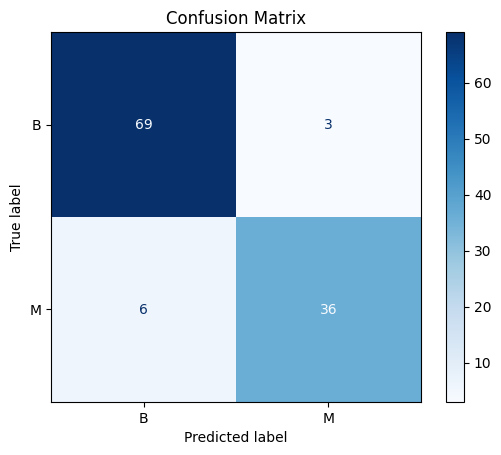

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Get unique class labels from both y_test and y_pred
class_names = sorted(list(set(test_label_gaussian) | set(hasil)))

# Menghitung confusion matrix dari class data testing dengan class hasil prediksi
cm = confusion_matrix(test_label_gaussian, hasil)

# Menampilkan confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [ ]:
#@title Using Capped Dataset

#Split Dataset Capped

train_data_capped, test_data_capped = train_test_split(dataset_capped, test_size = 0.2, random_state=42)
print(train_data_capped.shape)
print(test_data_capped.shape)

#train_data
train_data_capped_gaussian = np.array(train_data_capped)[:, 1:]
train_label_capped_gaussian = np.array(train_data_capped)[:, 0]
#test-data
test_data_gaussian = np.array(test_data_capped)[:, 1:]
test_label_gaussian = np.array(test_data_capped)[:, 0]

#normalisasi min-max scaller untuk train data dan test data
max_element_column = np.max(train_data_capped_gaussian, axis=0)
min_element_column = np.amin(train_data_capped_gaussian, axis=0)
new_min = 0
new_max = 1

train_data_scaled = ((train_data_capped_gaussian - min_element_column) * (new_max-new_min) / (max_element_column - min_element_column)) + new_min

test_data_scaled = ((test_data_gaussian - min_element_column) * (new_max-new_min) / (max_element_column - min_element_column)) + new_min

(455, 31)
(114, 31)


In [ ]:
#@title Modelling Process
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()

classifier.fit(train_data_scaled, train_label_capped_gaussian)

hasil = classifier.predict(test_data_scaled)
print(hasil)

['B' 'M' 'M' 'B' 'B' 'M' 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B'
 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M'
 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M'
 'B' 'B' 'M' 'B' 'B' 'M']


In [ ]:
#@title Model Evaluation using Sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Menghitung metrik
accuracy = accuracy_score(test_label_gaussian, hasil)
precision = precision_score(test_label_gaussian, hasil, average='macro')
recall = recall_score(test_label_gaussian, hasil, average='macro')
f1 = f1_score(test_label_gaussian, hasil, average='macro')

# Menampilkan hasil
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Accuracy: 0.9649122807017544
Precision: 0.9672569328433009
Recall: 0.9580740255486406
F1-Score: 0.9623015873015872


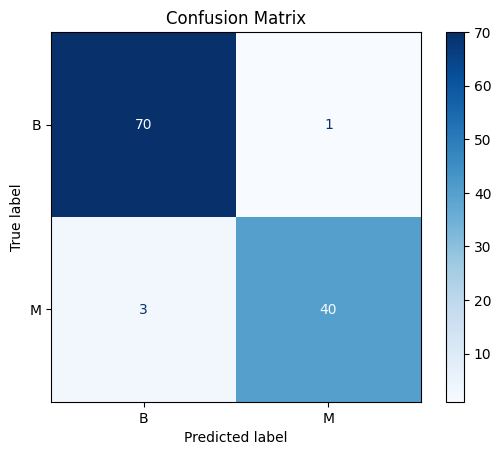

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Get unique class labels from both y_test and y_pred
class_names = sorted(list(set(test_label_gaussian) | set(hasil)))

# Menghitung confusion matrix dari class data testing dengan class hasil prediksi
cm = confusion_matrix(test_label_gaussian, hasil)

# Menampilkan confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


Ada perbedaan yang cukup banyak antara data yang dicapped dan data original
   
Dataset original:  
Accuracy: 0.9210526315789473  
Precision: 0.9215384615384616  
Recall: 0.9077380952380952  
F1-Score: 0.9138321995464853  
  
Dataset dengan Outlier Handling IQR:  
Accuracy: 0.9649122807017544  
Precision: 0.9672569328433009  
Recall: 0.9580740255486406  
F1-Score: 0.9623015873015872  

# KNN - Nearest Neighbour

In [ ]:
#@title Split Label dan Data
#train_data
train_data_knn = np.array(train_data)[:, 1:]
train_label_knn = np.array(train_data)[:, 0]
#test-data
test_data_knn = np.array(test_data)[:, 1:]
test_label_knn = np.array(test_data)[:, 0]

In [ ]:
#@title Normalisasi Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(train_data_knn)
X_train = scaler.transform(train_data_knn)
X_test = scaler.transform(test_data_knn)
print(X_train)
print()
print(X_test)

[[0.42780065 0.45755834 0.40709004 ... 0.34278351 0.27261975 0.19336219]
 [0.25268588 0.0906324  0.24227766 ... 0.32271478 0.24876799 0.08310376]
 [0.27776989 0.39431857 0.26839887 ... 0.19247423 0.18194362 0.17361931]
 ...
 [0.28486914 0.52147447 0.26826066 ... 0.20347079 0.14606742 0.0516201 ]
 [0.34166312 0.3659114  0.33598231 ... 0.46013746 0.19101124 0.15440115]
 [0.4770221  0.38180588 0.46997443 ... 0.62783505 0.2085551  0.13741309]]

[[0.20961711 0.03753805 0.20420151 ... 0.30783505 0.28602405 0.19801915]
 [0.66065597 0.46838011 0.65724553 ... 0.7233677  0.30770747 0.15381084]
 [0.4348999  0.21508285 0.43196738 ... 0.42989691 0.31302977 0.22668241]
 ...
 [0.35728146 0.32566791 0.34869739 ... 0.32969072 0.17859255 0.12849272]
 [0.38520517 0.23571187 0.38000138 ... 0.43024055 0.36467573 0.27784337]
 [0.43016707 0.3361515  0.41676456 ... 0.52233677 0.21387739 0.05791683]]


In [ ]:
#@title Modelling Process (K-Nearest Neighbors)

from sklearn.neighbors import KNeighborsClassifier

kNN = KNeighborsClassifier(n_neighbors=7, weights='distance', metric='euclidean')
kNN.fit(X_train, train_label_knn)
y_pred = kNN.predict(X_test)
print(y_pred)

['B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B'
 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'M' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'M'
 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'B' 'B' 'B' 'B' 'M']


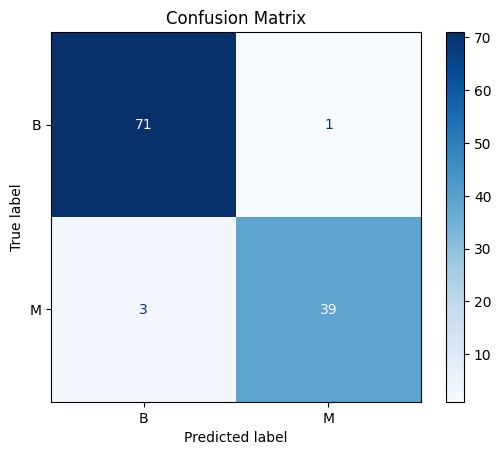

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Get unique class labels from both y_test and y_pred
class_names = sorted(list(set(test_label_knn) | set(y_pred)))

# Menghitung confusion matrix dari class data testing dengan class hasil prediksi
cm = confusion_matrix(test_label_knn, y_pred)

# Menampilkan confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [ ]:
#@title Model Evaluation using Sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Menghitung metrik
accuracy = accuracy_score(test_label_knn, y_pred)
precision = precision_score(test_label_knn, y_pred, average='macro')
recall = recall_score(test_label_knn, y_pred, average='macro')
f1 = f1_score(test_label_knn, y_pred, average='macro')

# Menampilkan hasil
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Accuracy: 0.9649122807017544
Precision: 0.9672297297297296
Recall: 0.9573412698412699
F1-Score: 0.9619111259605746


In [ ]:
#@title Using Capped Dataset
#train_data
train_data_capped_knn = np.array(train_data_capped)[:, 1:]
train_label_capped_knn = np.array(train_data_capped)[:, 0]
#test-data
test_data_capped_knn = np.array(test_data_capped)[:, 1:]
test_label_capped_knn = np.array(test_data_capped)[:, 0]

#normalisasi min-max scaller untuk train data dan test data
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(train_data_capped_knn)
X_train_capped = scaler.transform(train_data_capped_knn)
X_test_capped = scaler.transform(test_data_capped_knn)
print(X_train_capped)
print()
print(X_test_capped)

[[0.06552721 0.25769361 0.07732252 ... 0.60137457 0.52493594 0.52950153]
 [0.65620256 0.57017247 0.67420686 ... 0.9975945  0.49931007 0.62190573]
 [0.07257946 0.14034494 0.08023901 ... 0.174811   0.33845851 0.25313666]
 ...
 [0.32317939 0.2404464  0.30146536 ... 0.11453608 0.17602996 0.05222109]
 [0.30799745 0.33513696 0.30729834 ... 0.62783505 0.31815494 0.42777213]
 [0.21984426 0.36557322 0.20842225 ... 0.25536082 0.22255076 0.11648016]]

[[0.23404672 0.30064254 0.23595106 ... 0.34879725 0.2856298  0.27517803]
 [0.55090847 0.39228948 0.53834116 ... 0.61477663 0.19436231 0.09198033]
 [0.38047897 0.33040243 0.38255797 ... 0.52027491 0.25073921 0.21320787]
 ...
 [0.18752143 0.17653027 0.1845924  ... 0.33017182 0.2166371  0.19540522]
 [0.31975121 0.61345959 0.31747048 ... 0.28243986 0.06406466 0.19430315]
 [0.63857192 0.72404464 0.62441315 ... 0.57010309 0.25684999 0.23007799]]


In [ ]:
#@title Modelling Process
from sklearn.neighbors import KNeighborsClassifier

kNN = KNeighborsClassifier(n_neighbors=8, weights='distance', metric='euclidean')
kNN.fit(X_train_capped, train_label_capped_knn)
y_pred_capped = kNN.predict(X_test_capped)
print(y_pred_capped)

['B' 'M' 'M' 'B' 'B' 'M' 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B'
 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M'
 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M'
 'B' 'B' 'M' 'B' 'B' 'M']


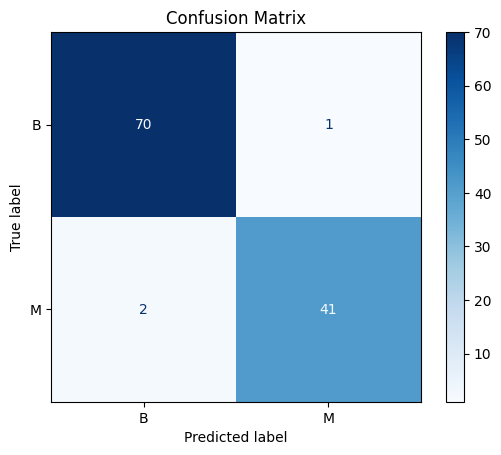

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Get unique class labels from both y_test and y_pred
class_names = sorted(list(set(test_label_capped_knn) | set(y_pred_capped)))

# Menghitung confusion matrix dari class data testing dengan class hasil prediksi
cm = confusion_matrix(test_label_capped_knn, y_pred_capped)

# Menampilkan confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [ ]:
#@title Model Evaluation using Sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Menghitung metrik
accuracy = accuracy_score(test_label_capped_knn, y_pred_capped)
precision = precision_score(test_label_capped_knn, y_pred_capped, average='macro')
recall = recall_score(test_label_capped_knn, y_pred_capped, average='macro')
f1 = f1_score(test_label_capped_knn, y_pred_capped, average='macro')

# Menampilkan hasil
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Accuracy: 0.9736842105263158
Precision: 0.9742063492063492
Recall: 0.9697019325253848
F1-Score: 0.9718634306869601


Ada sedikit perbedaan hasil dari dataset yang di capped outliernya dan yang tidak. Precision dan F1-score terlihat lebih tinggi dari sebelumnya. Tapi recall memiliki nilai yang lebih baik di dataset yang belum di capped. Untuk nilai K yang terbaik dari dataset yang belum di capped ada di 7 dan yang di capping ada di 8.  
  
Dataset Original:  
Accuracy: 0.9649122807017544  
Precision: 0.9672297297297296  
Recall: 0.9573412698412699  
F1-Score: 0.9619111259605746  
  
Dataset menggunakan Outlier Handling IQR:  
Accuracy: 0.9736842105263158  
Precision: 0.9742063492063492  
Recall: 0.9697019325253848  
F1-Score: 0.9718634306869601  
Karena ini dataset untuk breast cancer saya mencari recall paling tinggi, agar FN tidak tinggi karena Malignant adalah tumor ganas.

# Neural Network - MLP

In [ ]:
#@title Normalisasi Data dan Split

#train_data
data = train_data.iloc[:, 1:]
label = train_data.iloc[:, 0]

#test-data
data_test = test_data.iloc[:,1:]
label_test = test_data.iloc[:, 0]

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(data)
XMLP_train = scaler.transform(data)
XMLP_test = scaler.transform(data_test)
print(XMLP_train)
print()
print(XMLP_test)


[[0.42780065 0.45755834 0.40709004 ... 0.34278351 0.27261975 0.19336219]
 [0.25268588 0.0906324  0.24227766 ... 0.32271478 0.24876799 0.08310376]
 [0.27776989 0.39431857 0.26839887 ... 0.19247423 0.18194362 0.17361931]
 ...
 [0.28486914 0.52147447 0.26826066 ... 0.20347079 0.14606742 0.0516201 ]
 [0.34166312 0.3659114  0.33598231 ... 0.46013746 0.19101124 0.15440115]
 [0.4770221  0.38180588 0.46997443 ... 0.62783505 0.2085551  0.13741309]]

[[0.20961711 0.03753805 0.20420151 ... 0.30783505 0.28602405 0.19801915]
 [0.66065597 0.46838011 0.65724553 ... 0.7233677  0.30770747 0.15381084]
 [0.4348999  0.21508285 0.43196738 ... 0.42989691 0.31302977 0.22668241]
 ...
 [0.35728146 0.32566791 0.34869739 ... 0.32969072 0.17859255 0.12849272]
 [0.38520517 0.23571187 0.38000138 ... 0.43024055 0.36467573 0.27784337]
 [0.43016707 0.3361515  0.41676456 ... 0.52233677 0.21387739 0.05791683]]


In [ ]:
#@title Modelling Process
from sklearn.neural_network import MLPClassifier as MLP
# Model MLP
model = MLP(hidden_layer_sizes=(23, 40), max_iter=1000, activation='relu', learning_rate_init=0.001, solver='sgd', random_state=42)

# Training
model.fit(XMLP_train, label)

# Evaluasi

y_pred_MLP = model.predict(XMLP_test)
print(y_pred_MLP)
print('expected:',label_test)

['B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'M'
 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'B' 'B' 'B' 'M' 'M']
expected: 120    B
250    M
375    B
99     M
455    B
      ..
381    B
534    B
448    B
205    M
75     M
Name: diagnosis, Length: 114, dtype: object


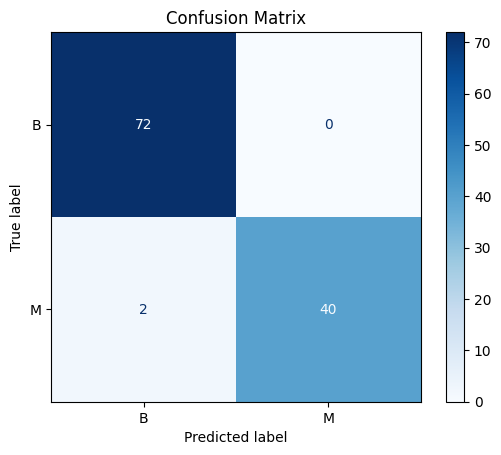

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Get unique class labels from both y_test and y_pred
class_names = sorted(list(set(label_test) | set(y_pred_MLP)))

# Menghitung confusion matrix dari class data testing dengan class hasil prediksi
cm = confusion_matrix(label_test, y_pred_MLP)

# Menampilkan confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [ ]:
#@title Model Evaluation using Sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Menghitung metrik
accuracy = accuracy_score(label_test, y_pred_MLP)
precision = precision_score(label_test, y_pred_MLP, average='macro')
recall = recall_score(label_test, y_pred_MLP, average='macro')
f1 = f1_score(label_test, y_pred_MLP, average='macro')

# Menampilkan hasil
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Accuracy: 0.9824561403508771
Precision: 0.9864864864864865
Recall: 0.9761904761904762
F1-Score: 0.9809555629802873


In [ ]:
#@title Using Data Capped

#train_data
data_capped = train_data_capped.iloc[:, 1:]
label_capped = train_data_capped.iloc[:, 0]

#test-data
data_test_capped = test_data_capped.iloc[:,1:]
label_test_capped = test_data_capped.iloc[:, 0]

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(data_capped)
XMLP_train_capped = scaler.transform(data_capped)
XMLP_test_capped = scaler.transform(data_test_capped)
print(XMLP_train_capped)
print()
print(XMLP_test_capped)


[[0.06552721 0.25769361 0.07732252 ... 0.60137457 0.52493594 0.52950153]
 [0.65620256 0.57017247 0.67420686 ... 0.9975945  0.49931007 0.62190573]
 [0.07257946 0.14034494 0.08023901 ... 0.174811   0.33845851 0.25313666]
 ...
 [0.32317939 0.2404464  0.30146536 ... 0.11453608 0.17602996 0.05222109]
 [0.30799745 0.33513696 0.30729834 ... 0.62783505 0.31815494 0.42777213]
 [0.21984426 0.36557322 0.20842225 ... 0.25536082 0.22255076 0.11648016]]

[[0.23404672 0.30064254 0.23595106 ... 0.34879725 0.2856298  0.27517803]
 [0.55090847 0.39228948 0.53834116 ... 0.61477663 0.19436231 0.09198033]
 [0.38047897 0.33040243 0.38255797 ... 0.52027491 0.25073921 0.21320787]
 ...
 [0.18752143 0.17653027 0.1845924  ... 0.33017182 0.2166371  0.19540522]
 [0.31975121 0.61345959 0.31747048 ... 0.28243986 0.06406466 0.19430315]
 [0.63857192 0.72404464 0.62441315 ... 0.57010309 0.25684999 0.23007799]]


In [ ]:
#@title Modelling Process
from sklearn.neural_network import MLPClassifier as MLP
# Model MLP
model = MLP(hidden_layer_sizes=(30, 15), max_iter=10000, activation='relu', learning_rate_init=0.001, solver='sgd', random_state=42, alpha=0.001)

# Training
model.fit(XMLP_train_capped, label_capped)

# Evaluasi

y_pred_MLP_capped = model.predict(XMLP_test_capped)
print(y_pred_MLP_capped)
print('expected:',label_test_capped)

['B' 'M' 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B'
 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M'
 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M'
 'B' 'B' 'M' 'B' 'B' 'M']
expected: 204    B
70     M
131    M
431    B
540    B
      ..
486    B
75     M
249    B
238    B
265    M
Name: diagnosis, Length: 114, dtype: object


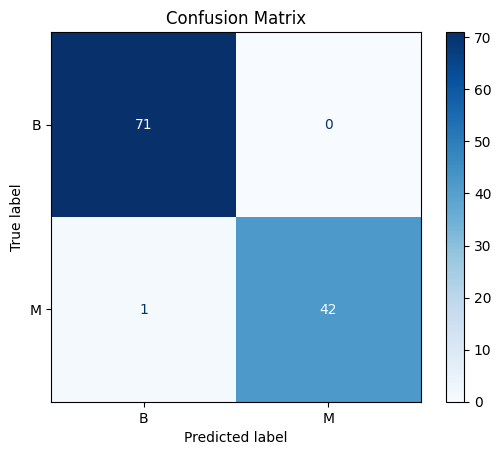

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Get unique class labels from both y_test and y_pred
class_names = sorted(list(set(label_test_capped) | set(y_pred_MLP_capped)))

# Menghitung confusion matrix dari class data testing dengan class hasil prediksi
cm = confusion_matrix(label_test_capped, y_pred_MLP_capped)

# Menampilkan confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [ ]:
#@title Model Evaluation using Sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Menghitung metrik
accuracy = accuracy_score(label_test_capped, y_pred_MLP_capped)
precision = precision_score(label_test_capped, y_pred_MLP_capped, average='macro')
recall = recall_score(label_test_capped, y_pred_MLP_capped, average='macro')
f1 = f1_score(label_test_capped, y_pred_MLP_capped, average='macro')

# Menampilkan hasil
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Accuracy: 0.9912280701754386
Precision: 0.9930555555555556
Recall: 0.9883720930232558
F1-Score: 0.99062114356232


Untuk perbedaan antara data original dengan yang sudah digunakan outlier handling ada satu kemajuan, yaitu pengurangan FN dan model evaluation recall sedikit bertambah.  
    
Data Original:  
Accuracy: 0.9824561403508771  
Precision: 0.9864864864864865  
Recall: 0.9761904761904762  
F1-Score: 0.9809555629802873  
  
Data yang menggunakan Outlier Handling IQR:  
Accuracy: 0.9912280701754386  
Precision: 0.9930555555555556  
Recall: 0.9883720930232558  
F1-Score: 0.99062114356232  

#Kesimpulan  
Model Processing terbaik pada studi kasus klasifikasi kanker payudara (Breast Cancer) diperoleh menggunakan algoritma **Multi-Layer Perceptron** (MLP Neural Network).
Berdasarkan hasil evaluasi terhadap model, diperoleh metrik sebagai berikut:

**Accuracy: 0.9912280701754386**  
**Precision: 0.9930555555555556**  
**Recall: 0.9883720930232558**  
**F1-Score: 0.99062114356232**

Hasil ini menunjukkan bahwa model MLP memiliki performa yang baik dan mampu melakukan klasifikasi dengan tingkat kesalahan yang sangat rendah. Nilai recall yang tinggi menunjukkan model efektif dalam mendeteksi kasus Malignant, yang merupakan aspek kritis dalam diagnosis breast cancer.